In [236]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [237]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing)

Исходное изображение


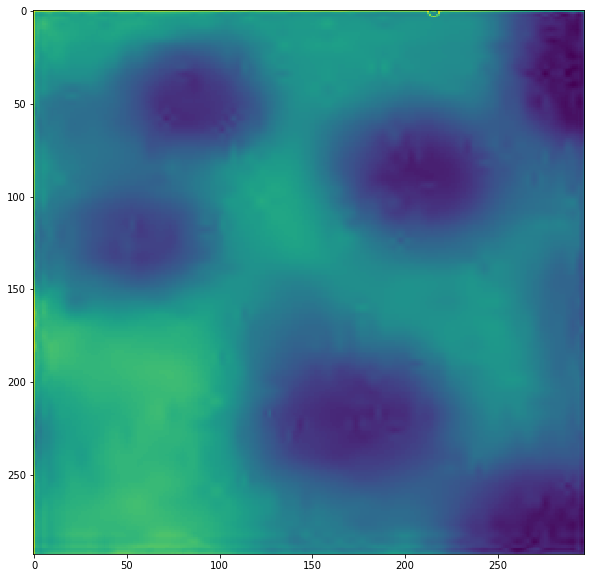

In [238]:
im = cv2.imread("WhatIsIt.png", cv2.IMREAD_GRAYSCALE)
original = cv2.imread("WhatIsIt.png")
print("Исходное изображение")
showImage(im)

Исходное изображение (бинарное)


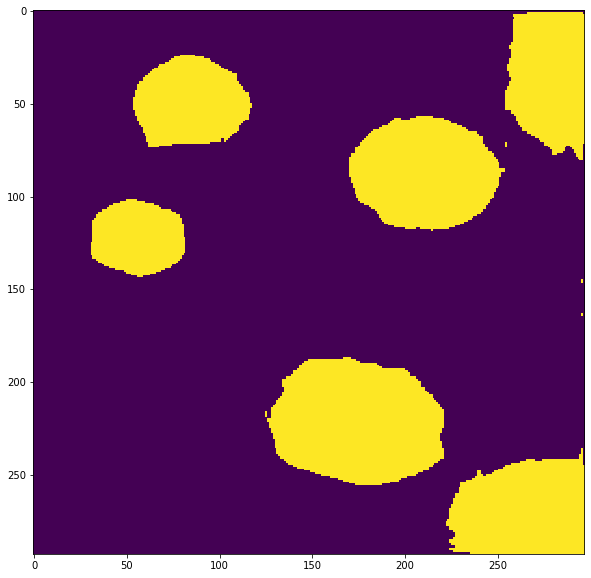

In [239]:
_, im = cv2.threshold(im, 72, 255, cv2.THRESH_BINARY_INV)
#ret, im = cv2.threshold(im, 100, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#ret, im = cv2.threshold(im, 100, 255, cv2.THRESH_OTSU)
print("Исходное изображение (бинарное)")
showImage(im)

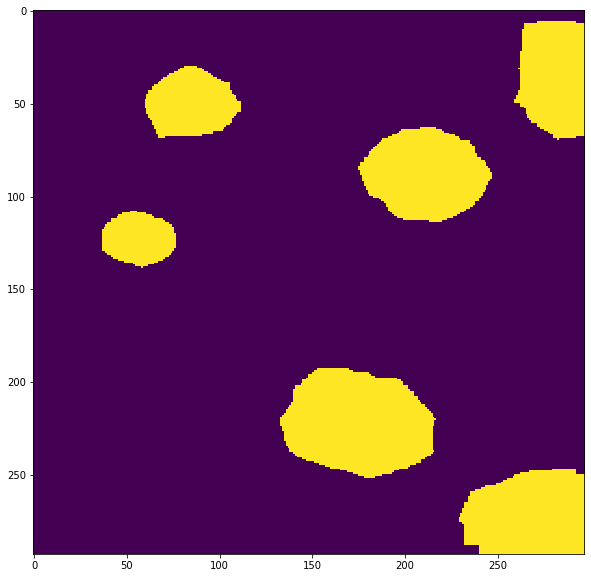

In [240]:
kernel = np.ones((10,10),np.uint8)
im = cv2.erode(im, kernel)
showImage(im)

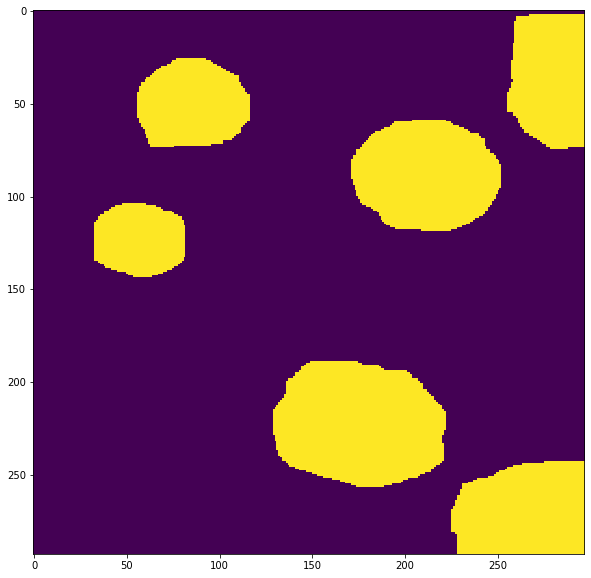

In [241]:
kernel = np.ones((10,10),np.uint8)
dilateImage = cv2.dilate(im, kernel, iterations = 1)
showImage(dilateImage)

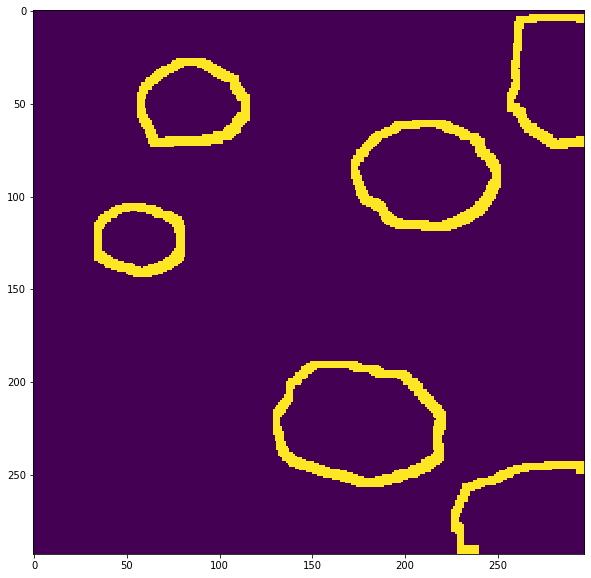

In [242]:
unknown = cv2.subtract(dilateImage,im)
showImage(unknown)

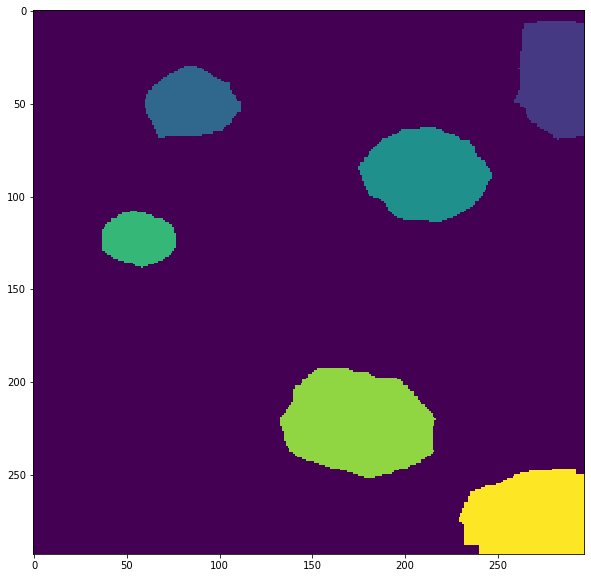

In [243]:
_, markers = cv2.connectedComponents(im)
showImage(markers)

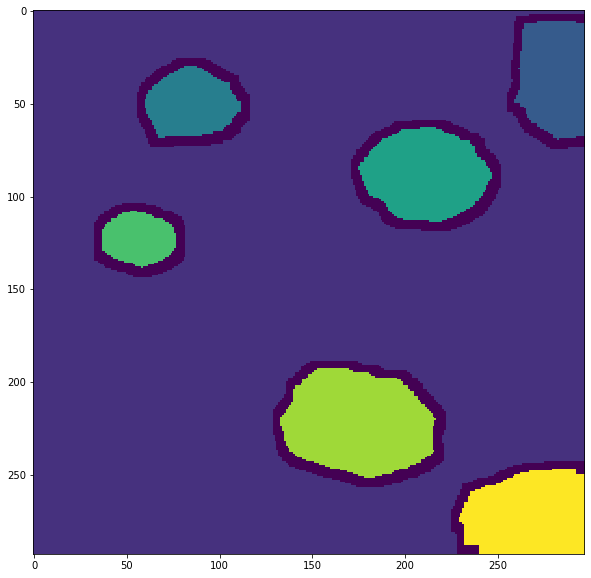

In [244]:
markers = markers + 1
markers[unknown==255] = 0
showImage(markers)

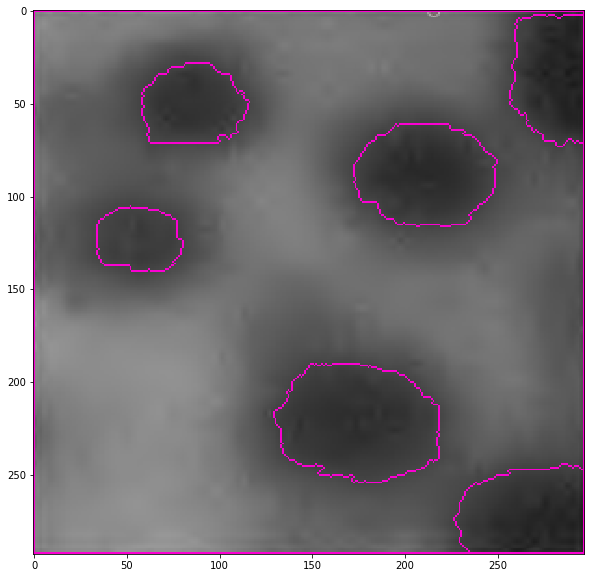

In [245]:
markers = cv2.watershed(original,markers)
original[markers== -1] = [250, 0, 210]
showImage(original)